In [1]:
from sklearn.datasets import load_wine
wine = load_wine()
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [2]:
X, y = wine.data, wine.target
X.shape, y.shape, set(y)

((178, 13), (178,), {0, 1, 2})

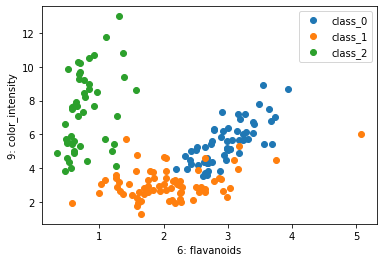

In [4]:
import matplotlib.pyplot as plt
i,j = 6,9
plt.xlabel(f"{i}: {wine.feature_names[i]}")
plt.ylabel(f"{j}: {wine.feature_names[j]}")
for k in set(y):
    plt.plot(X[:,i][y==k], X[:,j][y==k], "o", label=f"{wine.target_names[k]}")
plt.legend()
plt.show()

In [5]:
X69 = X[:, [6,9]]
X69.shape

(178, 2)

In [6]:
import numpy as np
class vizinho():
    def fit(self, X, y):
        self.X = X
        self.y = y
    def distancia(self, X):
        diferenca = self.X - X
        quadrado = diferenca ** 2
        soma = np.sum(quadrado, axis=1)
        raiz = np.sqrt(soma)
        return raiz
    def predict(self, X):
        ypred = np.empty((X.shape[0],))
        for i in range(X.shape[0]):
            distancias = self.distancia(X[i])
            vizinho = np.argmin(distancias)
            ypred[i] = self.y[vizinho]
        return ypred

In [7]:
from sklearn.metrics import accuracy_score
modelo = vizinho()
modelo.fit(X69, y)
ypred = modelo.predict(X69)
acuracia = accuracy_score(y, ypred)
acuracia

1.0